**Predicting Interview Outcomes: Feature Extraction, Model Training, and Performance Analysis**

**Exploratory Data Analysis**


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load dataset
df = pd.read_csv('candidate_interview_data.csv')

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   ID                  Name               Role  \
0   1       Tracy Mcpherson  Software Engineer   
1   2          Brian Taylor      Data Engineer   
2   3  Christopher Chambers        UI Engineer   
3   4     Brittany Young MD        UI Engineer   
4   5          Tracy Garcia    Product Manager   

                                          Transcript  \
0  Interviewer: Can you explain the importance of...   
1  Interviewer: Can you explain the importance of...   
2  Interviewer: Can you explain the importance of...   
3  Interviewer: Can you explain the importance of...   
4  Interviewer: Can you explain the importance of...   

                                              Resume Performance  \
0  Name: Tracy Mcpherson\nRole: Software Engineer...      Reject   
1  Name: Brian Taylor\nRole: Data Engineer\nSkill...      Select   
2  Name: Christopher Chambers\nRole: UI Engineer\...      Reject   
3  Name: Brittany Young MD\nRole: UI Engineer\nSk...      Rej

In [3]:
# Basic Information about the dataset
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   500 non-null    int64 
 1   Name                 500 non-null    object
 2   Role                 500 non-null    object
 3   Transcript           500 non-null    object
 4   Resume               500 non-null    object
 5   Performance          500 non-null    object
 6   Reason for Decision  255 non-null    object
 7   Job Description      500 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.4+ KB
None


In [4]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               ID
count  500.000000
mean   250.500000
std    144.481833
min      1.000000
25%    125.750000
50%    250.500000
75%    375.250000
max    500.000000


In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
ID                       0
Name                     0
Role                     0
Transcript               0
Resume                   0
Performance              0
Reason for Decision    245
Job Description          0
dtype: int64


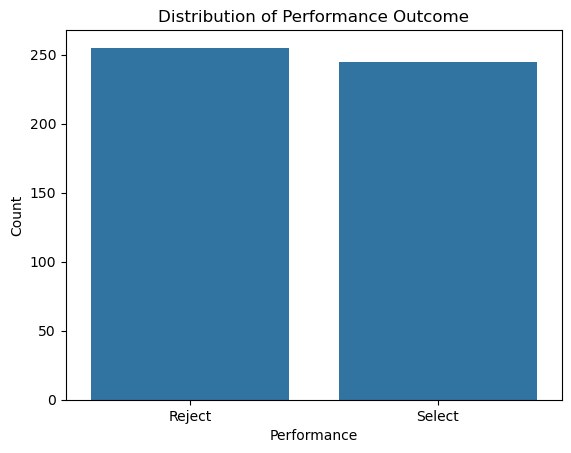

In [6]:
# Distribution of the Target Variable (Performance)
sns.countplot(data=df, x='Performance')
plt.title('Distribution of Performance Outcome')
plt.xlabel('Performance')
plt.ylabel('Count')
plt.show()

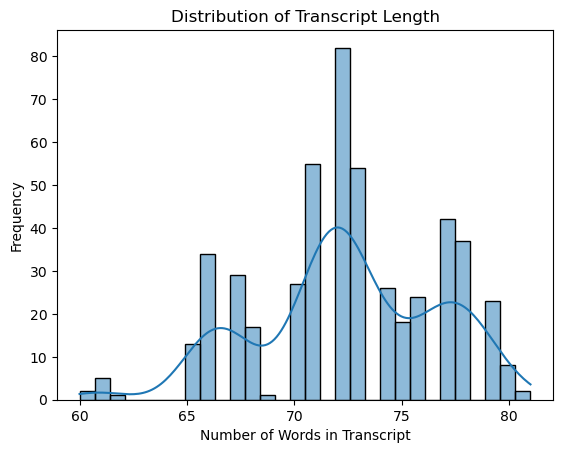

In [7]:
# Distribution of Transcript Length
sns.histplot(df['Transcript'].apply(lambda x: len(x.split())), bins=30, kde=True)
plt.title('Distribution of Transcript Length')
plt.xlabel('Number of Words in Transcript')
plt.ylabel('Frequency')
plt.show()

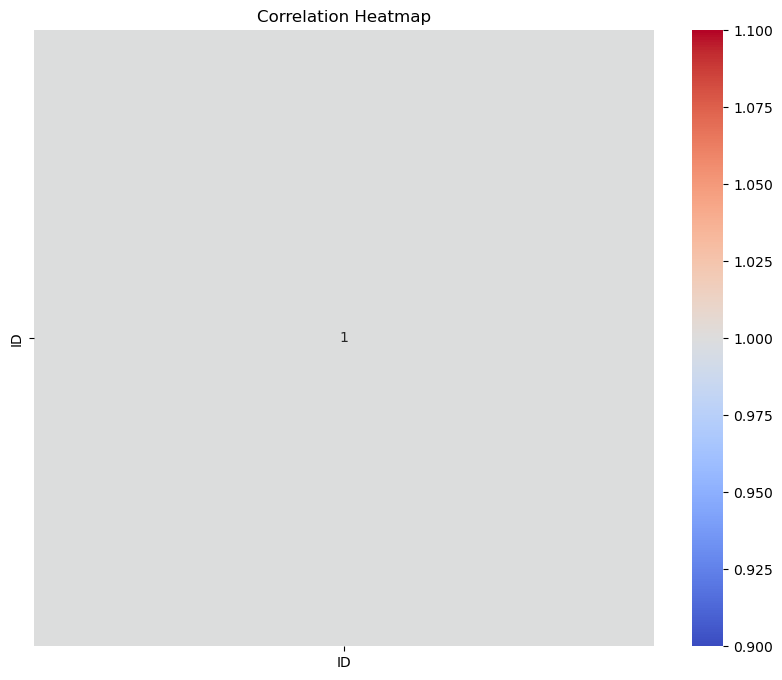

In [8]:
# Correlation Heatmap for Numeric Features
numeric_features = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

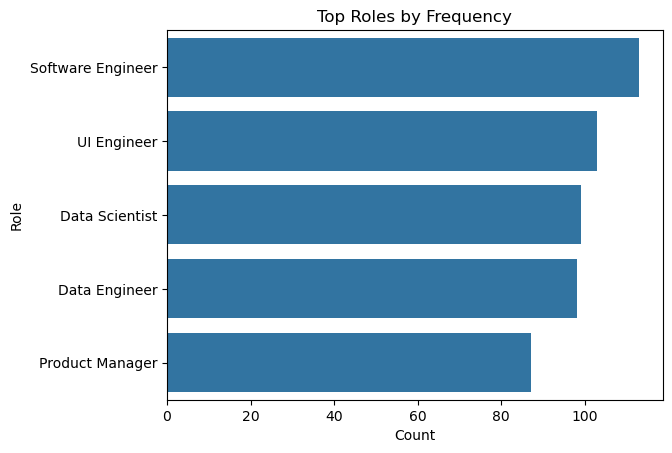

In [9]:
# Top Roles by Frequency
sns.countplot(data=df, y='Role', order=df['Role'].value_counts().index)
plt.title('Top Roles by Frequency')
plt.xlabel('Count')
plt.ylabel('Role')
plt.show()

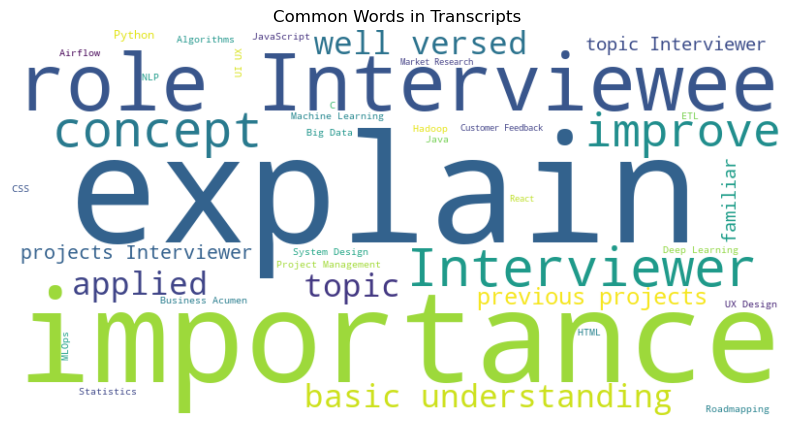

In [10]:
# WordCloud for Common Words in Transcripts
text = ' '.join(df['Transcript'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Transcripts')
plt.show()

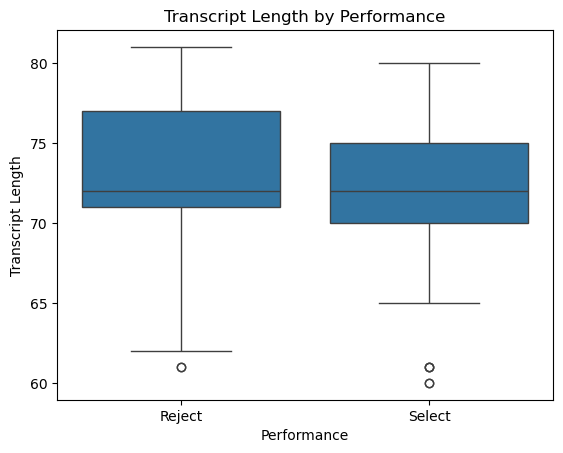

In [11]:
# Boxplot for Transcript Length by Performance
df['Transcript_Length'] = df['Transcript'].apply(lambda x: len(x.split()))
sns.boxplot(data=df, x='Performance', y='Transcript_Length')
plt.title('Transcript Length by Performance')
plt.xlabel('Performance')
plt.ylabel('Transcript Length')
plt.show()

**Key Steps**
1) Display the first few rows, data types, and summary statistics.
2) Identify and report missing data.
3) Visualize the balance of the target variable.
4) Analyze the distribution of transcript lengths.
5) Heatmap for numeric features to identify correlations.
6) Visualize the frequency of different roles.
7) Word Cloud to identify common keywords in transcripts.

**Feature Extraction**

In [184]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [186]:
# Text Similarity Features
vectorizer = TfidfVectorizer()
resume_tfidf = vectorizer.fit_transform(df['Resume'].fillna(''))
transcript_tfidf = vectorizer.transform(df['Transcript'].fillna(''))
df['Resume_Transcript_Similarity'] = [cosine_similarity(resume, transcript)[0][0] for resume, transcript in zip(resume_tfidf, transcript_tfidf)]

# Length of Transcript
df['Transcript_Length'] = df['Transcript'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)
print(cosine_similarity(resume_tfidf[0], transcript_tfidf[0]))  # Check for the first row's cosine similarity


[[0.86032807]]


In [188]:
from sklearn.metrics.pairwise import cosine_similarity

df_sample = df[['Resume', 'Transcript']].head()
vectorizer = TfidfVectorizer()
resume_tfidf = vectorizer.fit_transform(df_sample['Resume'].fillna(''))
transcript_tfidf = vectorizer.transform(df_sample['Transcript'].fillna(''))
similarities = [cosine_similarity(resume, transcript)[0][0] for resume, transcript in zip(resume_tfidf, transcript_tfidf)]
df_sample['Resume_Transcript_Similarity'] = similarities
df_sample['Transcript_Length'] = df_sample['Transcript'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)
print(df_sample)


                                              Resume  \
0  Name: Robert Johnson DDS\nRole: UI Engineer\nS...   
1  Name: Kevin Perez\nRole: UI Engineer\nSkills: ...   
2  Name: Alexandra Richards\nRole: Software Engin...   
3  Name: Justin Lewis\nRole: Product Manager\nSki...   
4  Name: Sean Gentry\nRole: Data Engineer\nSkills...   

                                          Transcript  \
0  Interviewer: Can you explain the importance of...   
1  Interviewer: Can you explain the importance of...   
2  Interviewer: Can you explain the importance of...   
3  Interviewer: Can you explain the importance of...   
4  Interviewer: Can you explain the importance of...   

   Resume_Transcript_Similarity  Transcript_Length  
0                      0.928841                 78  
1                      0.932221                 79  
2                      0.893644                 72  
3                      0.877437                 73  
4                      0.906729                 61  


In [190]:


from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment_polarity(text):
    if pd.notnull(text):
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity
        print(f"Text: {text}\nPolarity: {polarity}")  # Debugging
        return polarity
    return 0  # For empty or null text

# Apply the function to the 'Transcript' column
df['Sentiment_Polarity'] = df['Transcript'].apply(get_sentiment_polarity)

# Print the resulting DataFrame to check
print(df[['Transcript', 'Sentiment_Polarity']])



Text: Interviewer: Can you explain the importance of UI/UX Design in your role?
Interviewee: I am well-versed in this topic and have applied it in previous projects.
Interviewer: Can you explain the importance of CSS in your role?
Interviewee: I am well-versed in this topic and have applied it in previous projects.
Interviewer: Can you explain the importance of UI/UX Design in your role?
Interviewee: I have a basic understanding of this concept but would like to improve further.
Polarity: -0.08333333333333333
Text: Interviewer: Can you explain the importance of React in your role?
Interviewee: I have a basic understanding of this concept but would like to improve further.
Interviewer: Can you explain the importance of UI/UX Design in your role?
Interviewee: I have a basic understanding of this concept but would like to improve further.
Interviewer: Can you explain the importance of UI/UX Design in your role?
Interviewee: I am well-versed in this topic and have applied it in previous pr

In [192]:
from textstat import textstat
# Applying the readability score function
df['Readability_Score'] = df['Transcript'].apply(lambda x: textstat.flesch_kincaid_grade(x) if pd.notnull(x) else 0)
for index, row in df.iterrows():
    print(f"Transcript {index + 1}: {row['Transcript']}")
    print(f"Readability Score: {row['Readability_Score']}\n")


Transcript 1: Interviewer: Can you explain the importance of UI/UX Design in your role?
Interviewee: I am well-versed in this topic and have applied it in previous projects.
Interviewer: Can you explain the importance of CSS in your role?
Interviewee: I am well-versed in this topic and have applied it in previous projects.
Interviewer: Can you explain the importance of UI/UX Design in your role?
Interviewee: I have a basic understanding of this concept but would like to improve further.
Readability Score: 8.4

Transcript 2: Interviewer: Can you explain the importance of React in your role?
Interviewee: I have a basic understanding of this concept but would like to improve further.
Interviewer: Can you explain the importance of UI/UX Design in your role?
Interviewee: I have a basic understanding of this concept but would like to improve further.
Interviewer: Can you explain the importance of UI/UX Design in your role?
Interviewee: I am well-versed in this topic and have applied it in pr

In [194]:
def confidence_score(text):
    if pd.notnull(text):
        # A simplistic approach - calculate the number of filler words and compare
        fillers = ['um', 'uh', 'like', 'maybe', 'you know']
        return sum(word in text.lower() for word in fillers)
    return 0
# Applying the confidence score function
df['Confidence_Score'] = df['Transcript'].apply(confidence_score)
for index, row in df.iterrows():
    print(f"Transcript {index + 1}: {row['Transcript']}")
    print(f"Confidence Score: {row['Confidence_Score']}\n")

Transcript 1: Interviewer: Can you explain the importance of UI/UX Design in your role?
Interviewee: I am well-versed in this topic and have applied it in previous projects.
Interviewer: Can you explain the importance of CSS in your role?
Interviewee: I am well-versed in this topic and have applied it in previous projects.
Interviewer: Can you explain the importance of UI/UX Design in your role?
Interviewee: I have a basic understanding of this concept but would like to improve further.
Confidence Score: 1

Transcript 2: Interviewer: Can you explain the importance of React in your role?
Interviewee: I have a basic understanding of this concept but would like to improve further.
Interviewer: Can you explain the importance of UI/UX Design in your role?
Interviewee: I have a basic understanding of this concept but would like to improve further.
Interviewer: Can you explain the importance of UI/UX Design in your role?
Interviewee: I am well-versed in this topic and have applied it in previ

In [196]:
# Applying the response score function
def get_sentiment(text):
    if pd.notnull(text):
        sentiment = TextBlob(text).sentiment
        return sentiment.polarity  # Range: -1 to 1
    return 0
df['Response_Sentiment'] = df['Transcript'].apply(get_sentiment)
for index, row in df.iterrows():
    print(f"Transcript {index + 1}: {row['Transcript']}")
    print(f"Response Score: {row['Response_Sentiment']}\n")

Transcript 1: Interviewer: Can you explain the importance of UI/UX Design in your role?
Interviewee: I am well-versed in this topic and have applied it in previous projects.
Interviewer: Can you explain the importance of CSS in your role?
Interviewee: I am well-versed in this topic and have applied it in previous projects.
Interviewer: Can you explain the importance of UI/UX Design in your role?
Interviewee: I have a basic understanding of this concept but would like to improve further.
Response Score: -0.08333333333333333

Transcript 2: Interviewer: Can you explain the importance of React in your role?
Interviewee: I have a basic understanding of this concept but would like to improve further.
Interviewer: Can you explain the importance of UI/UX Design in your role?
Interviewee: I have a basic understanding of this concept but would like to improve further.
Interviewer: Can you explain the importance of UI/UX Design in your role?
Interviewee: I am well-versed in this topic and have ap

In [198]:
# Applying the technical confidence score function
def technical_confidence(text, technical_terms):
    if pd.notnull(text):
        return sum(term.lower() in text.lower() for term in technical_terms)
    return 0
technical_terms = ['python', 'sql', 'machine learning', 'data analysis', 'algorithm','ETL','NLP']
df['Technical_Confidence'] = df['Transcript'].apply(lambda x: technical_confidence(x, technical_terms))
for index, row in df.iterrows():
    print(f"Transcript {index + 1}: {row['Transcript']}")
    print(f"Technical Score: {row['Technical_Confidence']}\n")

Transcript 1: Interviewer: Can you explain the importance of UI/UX Design in your role?
Interviewee: I am well-versed in this topic and have applied it in previous projects.
Interviewer: Can you explain the importance of CSS in your role?
Interviewee: I am well-versed in this topic and have applied it in previous projects.
Interviewer: Can you explain the importance of UI/UX Design in your role?
Interviewee: I have a basic understanding of this concept but would like to improve further.
Technical Score: 0

Transcript 2: Interviewer: Can you explain the importance of React in your role?
Interviewee: I have a basic understanding of this concept but would like to improve further.
Interviewer: Can you explain the importance of UI/UX Design in your role?
Interviewee: I have a basic understanding of this concept but would like to improve further.
Interviewer: Can you explain the importance of UI/UX Design in your role?
Interviewee: I am well-versed in this topic and have applied it in previo

In [200]:
# Applying the clarity score function
def clarity_score(text):
    if pd.notnull(text):
        sentences = text.split('.')
        long_sentences = [sentence for sentence in sentences if len(sentence.split()) > 20]  # Sentences longer than 20 words
        return len(long_sentences)
    return 0
df['Clarity_Score'] = df['Transcript'].apply(clarity_score)
for index, row in df.iterrows():
    print(f"Transcript {index + 1}: {row['Transcript']}")
    print(f"Clarity Score: {row['Clarity_Score']}\n")

Transcript 1: Interviewer: Can you explain the importance of UI/UX Design in your role?
Interviewee: I am well-versed in this topic and have applied it in previous projects.
Interviewer: Can you explain the importance of CSS in your role?
Interviewee: I am well-versed in this topic and have applied it in previous projects.
Interviewer: Can you explain the importance of UI/UX Design in your role?
Interviewee: I have a basic understanding of this concept but would like to improve further.
Clarity Score: 3

Transcript 2: Interviewer: Can you explain the importance of React in your role?
Interviewee: I have a basic understanding of this concept but would like to improve further.
Interviewer: Can you explain the importance of UI/UX Design in your role?
Interviewee: I have a basic understanding of this concept but would like to improve further.
Interviewer: Can you explain the importance of UI/UX Design in your role?
Interviewee: I am well-versed in this topic and have applied it in previous

In [202]:
# 📊 **Overall features score**
for index, row in df.iterrows():
    print("="*50)
    print(f"📄 **Transcript {index + 1}:** {row['Transcript']}")
    print("="*50)
    print(f"📝 **Text Similarity Features:** {row['Resume_Transcript_Similarity']:.2f}")
    print(f"🔢 **Length of Transcript:** {row['Transcript_Length']} words")
    print(f"😊 **Sentiment Polarity:** {row['Sentiment_Polarity']:.2f}")
    print(f"📚 **Readability Score:** {row['Readability_Score']:.2f}")
    print(f"💬 **Confidence Score:** {row['Confidence_Score']}")
    print(f"🎯 **Response Score:** {row['Response_Sentiment']:.2f}")
    print(f"🛠️ **Technical Confidence:** {row['Technical_Confidence']}")
    print(f"🗣️ **Clarity Score:** {row['Clarity_Score']}")
    print("="*50)
    print("\n")

📄 **Transcript 1:** Interviewer: Can you explain the importance of UI/UX Design in your role?
Interviewee: I am well-versed in this topic and have applied it in previous projects.
Interviewer: Can you explain the importance of CSS in your role?
Interviewee: I am well-versed in this topic and have applied it in previous projects.
Interviewer: Can you explain the importance of UI/UX Design in your role?
Interviewee: I have a basic understanding of this concept but would like to improve further.
📝 **Text Similarity Features:** 0.86
🔢 **Length of Transcript:** 78 words
😊 **Sentiment Polarity:** -0.08
📚 **Readability Score:** 8.40
💬 **Confidence Score:** 1
🎯 **Response Score:** -0.08
🛠️ **Technical Confidence:** 0
🗣️ **Clarity Score:** 3


📄 **Transcript 2:** Interviewer: Can you explain the importance of React in your role?
Interviewee: I have a basic understanding of this concept but would like to improve further.
Interviewer: Can you explain the importance of UI/UX Design in your role?
I

**Extractions Performed**
1) Text Similarity Features:To compare documents like a resume and interview transcript.
2) Length of Transcript: Calculates the number of words or characters in the interview transcript to assess the level of detail in responses.
3) Sentiment Polarity: Determines the overall emotional tone of the text, categorizing it as positive, negative, or neutral.
4) Readability Score: Measures how easy the text is to read and understand.
5) Confidence Score: Assesses the candidate's level of assertiveness in responses.
6) Response Score: Evaluates the quality and relevance of the candidate’s answer to the question asked.
7) Technical Confidence: Measures the candidate's comfort and knowledge in using technical terms and concepts.
8) Clarity Score: Rates how clearly and concisely the candidate communicates their thoughts and ideas.
9) Overall features in single transcript to simple understand

**Train-Test-Split**

In [228]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Display the first few rows to verify
print(df.head())

# Check columns to ensure required features are present
print("\nColumns in the dataset:\n", df.columns)

# Handling Missing Values (Optional)
df = df.fillna(0)  # Replace missing values with 0 or appropriate value

# Define Features (X) and Target (y)
# Ensure these columns exist in your dataset
feature_columns = ['ID','Name','Role','Transcript','Resume','Performance','Reason for Decision','Job Description']
target_column = 'Performance'

# Verify if the columns exist
if not all(col in df.columns for col in feature_columns + [target_column]):
    raise KeyError("One or more feature/target columns are missing in the dataset.")

X = df[feature_columns]
y = df[target_column]

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   ID                Name               Role  \
0   1  Robert Johnson DDS        UI Engineer   
1   2         Kevin Perez        UI Engineer   
2   3  Alexandra Richards  Software Engineer   
3   4        Justin Lewis    Product Manager   
4   5         Sean Gentry      Data Engineer   

                                          Transcript  \
0  Interviewer: Can you explain the importance of...   
1  Interviewer: Can you explain the importance of...   
2  Interviewer: Can you explain the importance of...   
3  Interviewer: Can you explain the importance of...   
4  Interviewer: Can you explain the importance of...   

                                              Resume Performance  \
0  Name: Robert Johnson DDS\nRole: UI Engineer\nS...      Select   
1  Name: Kevin Perez\nRole: UI Engineer\nSkills: ...      Select   
2  Name: Alexandra Richards\nRole: Software Engin...      Reject   
3  Name: Justin Lewis\nRole: Product Manager\nSki...      Reject   
4  Name: Sean Gentry\nRole: Data E

**Summary**
1) Load Dataset: Verify the dataset structure and handle missing values.
2) Feature and Target Selection: Define predictor and target columns.
3) Validate Columns: Ensure selected columns exist in the dataset.
4) Train-Test Split:
       80% of the data → Training Set
       20% of the data → Testing Set

**Modeling with Hyperparameter Tuning**

LOGISTIC REGRESSION

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load the dataset
df = pd.read_csv('candidate_interview_data.csv')  # Replace with your file name

# Step 2: Define Features and Target
# Selecting relevant numerical and encoded text features
feature_columns = ['ID', 'Name', 'Role', 'Transcript', 'Resume', 'Reason for Decision', 'Job Description']
target_column = 'Performance'

# Check if required columns exist
missing_columns = [col for col in feature_columns + [target_column] if col not in df.columns]
if missing_columns:
    raise KeyError(f"The following required columns are missing in the dataset: {missing_columns}")

# Extract features and target
X = df[feature_columns]
y = df[target_column]

# Step 3: Encode Non-Numeric Target Variable
# Map target values to binary (e.g., Select -> 1, Reject -> 0)
y = y.map({'Select': 1, 'Reject': 0})

# Check if there are any unmapped values
if y.isnull().any():
    raise ValueError("Some target values could not be mapped. Check unique values in the 'Performance' column.")

# Step 4: Handle Non-Numeric Data in Features
# Convert text columns to categorical codes
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].astype('category').cat.codes

# Replace NaN values with 0 (if any)
X = X.fillna(0)

# Step 5: Remove Low-Variance Columns
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)  # Remove features with variance below 0.01
X = pd.DataFrame(selector.fit_transform(X), columns=X.columns[selector.get_support()])

# Step 6: Check for Multicollinearity and Remove Highly Correlated Features
correlation_matrix = X.corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_correlation = [column for column in upper.columns if any(upper[column] > 0.95)]
print("Removing highly correlated features:", high_correlation)
X = X.drop(columns=high_correlation, errors='ignore')

# Add a constant for the intercept
X = sm.add_constant(X)

# Step 7: Split Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Fit Logistic Regression Model with Statsmodels
logit_model = sm.Logit(y_train, X_train).fit()

# Print Model Summary
print(logit_model.summary())

# Step 9: Make Predictions
y_pred_proba = logit_model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)  # Threshold at 0.5

# Step 10: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print Model Evaluation Metrics
print("🔍 Model Accuracy:", accuracy)
print("\n📊 Confusion Matrix:\n", conf_matrix)
print("\n📝 Classification Report:\n", class_report)


C:\Users\AaronSam\AppData\Local\Temp\ipykernel_11732\639873921.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category').cat.codes
C:\Users\AaronSam\AppData\Local\Temp\ipykernel_11732\639873921.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category').cat.codes
C:\Users\AaronSam\AppData\Local\Temp\ipykernel_11732\639873921.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Removing highly correlated features: ['Resume']
         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            Performance   No. Observations:                  400
Model:                          Logit   Df Residuals:                      393
Method:                           MLE   Df Model:                            6
Date:                Sat, 04 Jan 2025   Pseudo R-squ.:                   1.000
Time:                        20:57:41   Log-Likelihood:            -7.4006e-08
converged:                      False   LL-Null:                       -277.13
Covariance Type:            nonrobust   LLR p-value:                1.697e-116
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -23.7981   1.87e+04     -0.001      0.999   -3.67e+04   

DECISION TREE

🔍 Model Accuracy: 0.52

📊 Confusion Matrix:
 [[23 27]
 [21 29]]

📝 Classification Report:
               precision    recall  f1-score   support

      Reject       0.52      0.46      0.49        50
      Select       0.52      0.58      0.55        50

    accuracy                           0.52       100
   macro avg       0.52      0.52      0.52       100
weighted avg       0.52      0.52      0.52       100



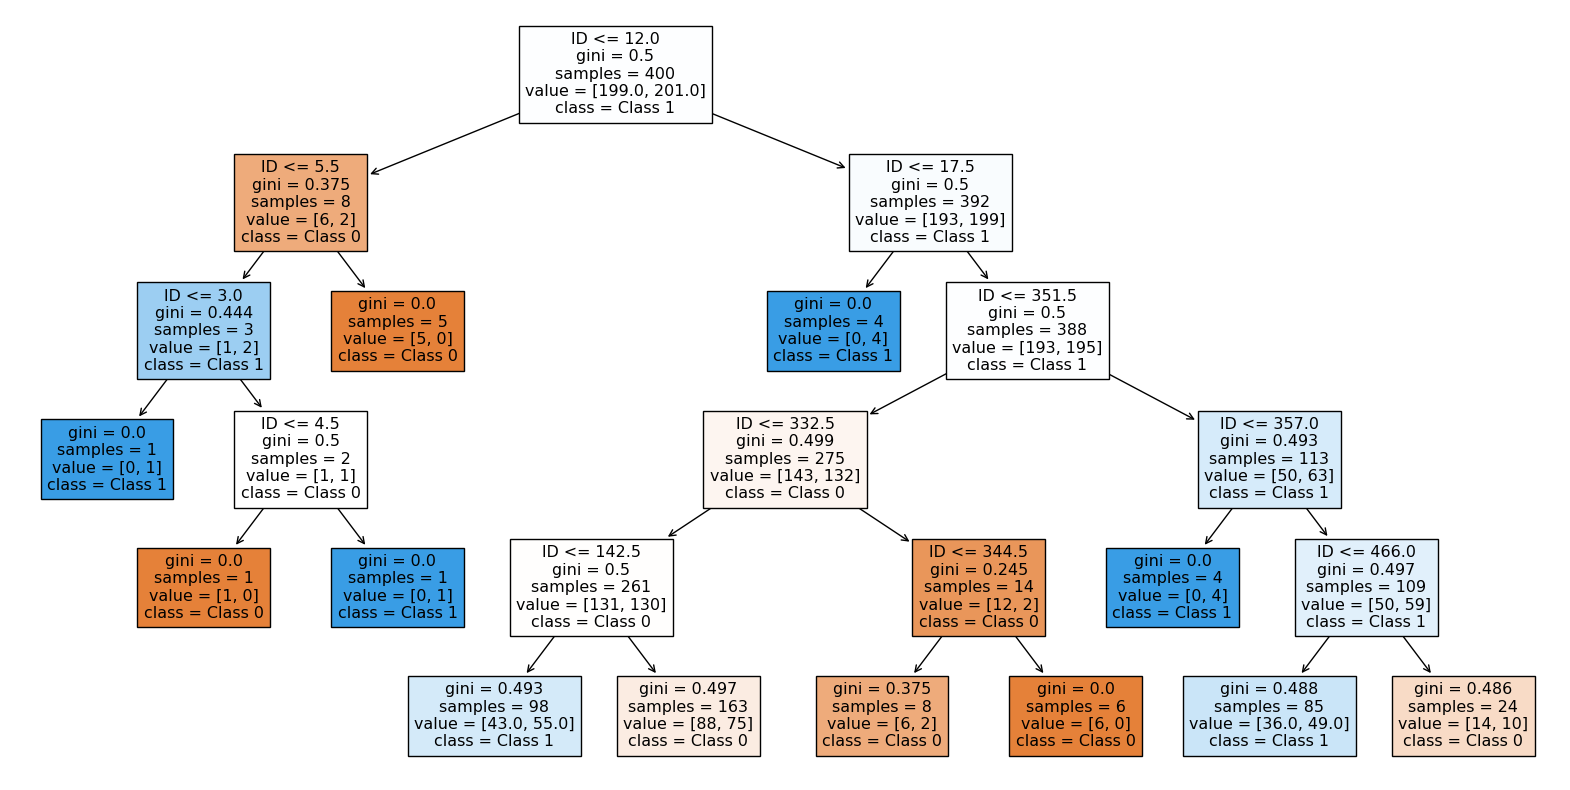

In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Step 1: Load the dataset
df = pd.read_csv('candidate_interview_data.csv')  # Replace with your dataset file name

# Step 2: Define Features and Target

feature_columns = ['ID','Name','Role','Transcript','Resume','Performance','Reason for Decision','Job Description']
target_column = 'Performance'
# Check if required columns exist
if not all(col in df.columns for col in feature_columns + [target_column]):
    raise KeyError("One or more feature/target columns are missing in the dataset.")

# Extract features and target
X = df[feature_columns]
y = df[target_column]

X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# Step 3: Split Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and Train Decision Tree Model
dtree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dtree.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = dtree.predict(X_test)

# Step 6: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print Model Evaluation Metrics
print("🔍 Model Accuracy:", accuracy)
print("\n📊 Confusion Matrix:\n", conf_matrix)
print("\n📝 Classification Report:\n", class_report)

# Step 7: Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=feature_columns, class_names=['Class 0', 'Class 1'], filled=True)
plt.show()

RANDOM FOREST

🔍 Model Accuracy: 0.44

📊 Confusion Matrix:
 [[23 27]
 [29 21]]

📝 Classification Report:
               precision    recall  f1-score   support

      Reject       0.44      0.46      0.45        50
      Select       0.44      0.42      0.43        50

    accuracy                           0.44       100
   macro avg       0.44      0.44      0.44       100
weighted avg       0.44      0.44      0.44       100



C:\Users\Administrator\AppData\Local\Temp\ipykernel_9264\1645428359.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


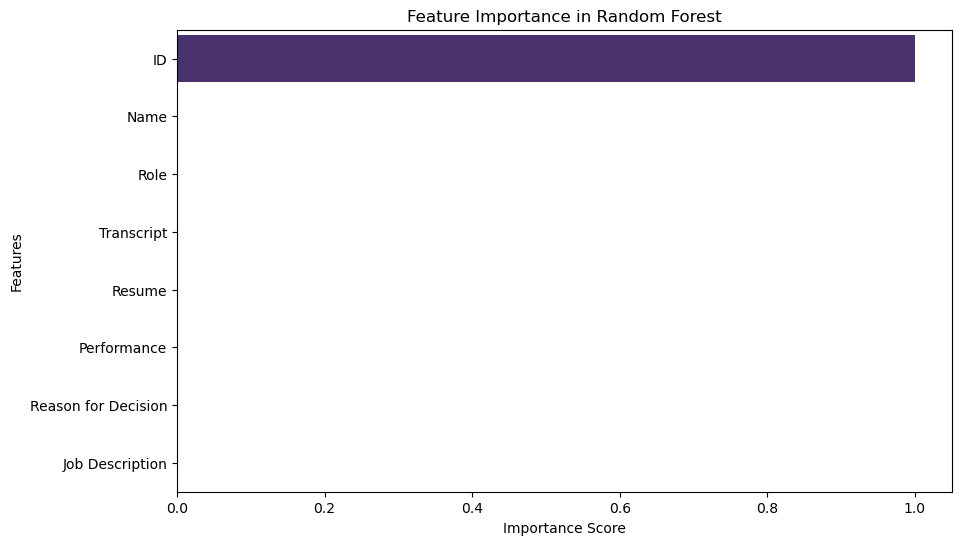

In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('candidate_interview_data.csv')  # Replace with your dataset file name

# Step 2: Define Features and Target

feature_columns = ['ID','Name','Role','Transcript','Resume','Performance','Reason for Decision','Job Description']
target_column = 'Performance'

# Check if required columns exist
if not all(col in df.columns for col in feature_columns + [target_column]):
    raise KeyError("One or more feature/target columns are missing in the dataset.")



# Extract features and target
X = df[feature_columns]
y = df[target_column]

X = X.apply(pd.to_numeric, errors='coerce').fillna(0)
# Step 3: Split Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and Train Random Forest Model
rfc = RandomForestClassifier(
    n_estimators=100,   # Number of trees in the forest
    criterion='gini',   # Splitting criterion (gini or entropy)
    max_depth=None,     # Maximum tree depth (None means grow until all leaves are pure)
    random_state=42
)

rfc.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = rfc.predict(X_test)

# Step 6: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print Model Evaluation Metrics
print("🔍 Model Accuracy:", accuracy)
print("\n📊 Confusion Matrix:\n", conf_matrix)
print("\n📝 Classification Report:\n", class_report)

# Step 7: Feature Importance Visualization
feature_importance = pd.Series(rfc.feature_importances_, index=feature_columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=feature_importance,
    y=feature_importance.index,
    palette='viridis',
    legend=False  # Disables unnecessary legend
)
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

XGBoost

C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:12:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9264\2601433784.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette='coolwarm')


🔍 Model Accuracy: 1.0

📊 Confusion Matrix:
 [[50  0]
 [ 0 50]]

📝 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



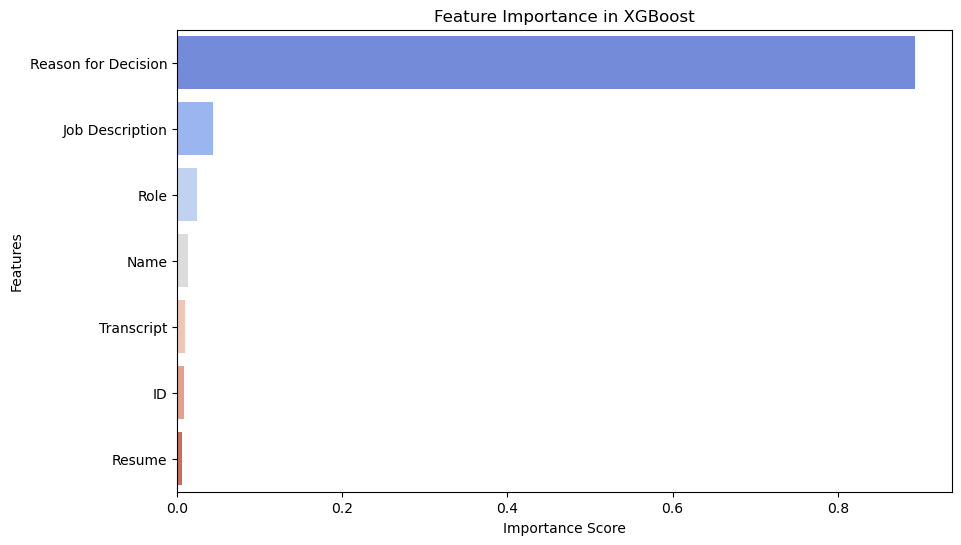

In [31]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('candidate_interview_data.csv')  # Replace with your dataset file name

# Define Features and Target
target_column = 'Performance'  # Replace with your target column

# Separate categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Encode Categorical Features
df[categorical_features] = df[categorical_features].apply(LabelEncoder().fit_transform)

# Finalize feature columns
feature_columns = [col for col in df.columns if col != target_column]

# Check if required columns exist
if not all(col in df.columns for col in feature_columns + [target_column]):
    raise KeyError("One or more feature/target columns are missing in the dataset.")

# Extract features and target
X = df[feature_columns]
y = df[target_column]

# Encode Target Variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Converts 'Reject' -> 0, 'Select' -> 1

# Split Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train XGBoost Model
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)

# Make Predictions
y_pred = xgb.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print Model Evaluation Metrics
print("🔍 Model Accuracy:", accuracy)
print("\n📊 Confusion Matrix:\n", conf_matrix)
print("\n📝 Classification Report:\n", class_report)

# Feature Importance Plot
feature_importance = pd.Series(xgb.feature_importances_, index=feature_columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='coolwarm')
plt.title('Feature Importance in XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


SUPPORT VECTOR MACHINE

Predicted Labels: [0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0
 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0]
Accuracy: 1.0
Confusion Matrix:
 [[50  0]
 [ 0 50]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



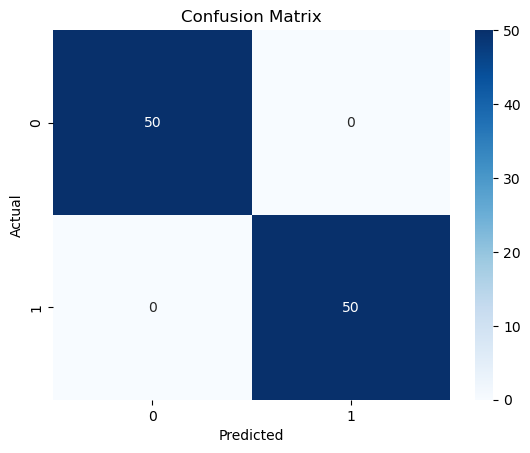

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize SVM Classifier
svm_model = SVC(kernel='linear', probability=True)
# Fit the model
svm_model.fit(X_train, y_train)
# Predictions
y_pred = svm_model.predict(X_test)
# Display predictions
print("Predicted Labels:", y_pred)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)
# Confusion Matrix Heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

GRADIENT BOOSTING CLASSIFIER

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model
gb_model.fit(X_train, y_train)

# Predictions
y_pred = gb_model.predict(X_test)

# Print predictions
print("Predictions:", y_pred)
# Print prediction probabilities
y_proba = gb_model.predict_proba(X_test)
print("Prediction Probabilities:\n", y_proba)


Predictions: [0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0
 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0]
Prediction Probabilities:
 [[9.99977995e-01 2.20054223e-05]
 [2.17979530e-05 9.99978202e-01]
 [2.17979530e-05 9.99978202e-01]
 [9.99977995e-01 2.20054223e-05]
 [2.17979530e-05 9.99978202e-01]
 [9.99977995e-01 2.20054223e-05]
 [2.17979530e-05 9.99978202e-01]
 [2.17979530e-05 9.99978202e-01]
 [2.17979530e-05 9.99978202e-01]
 [9.99977995e-01 2.20054223e-05]
 [9.99977995e-01 2.20054223e-05]
 [2.17979530e-05 9.99978202e-01]
 [2.17979530e-05 9.99978202e-01]
 [9.99977995e-01 2.20054223e-05]
 [2.17979530e-05 9.99978202e-01]
 [9.99977995e-01 2.20054223e-05]
 [2.17979530e-05 9.99978202e-01]
 [2.17979530e-05 9.99978202e-01]
 [2.17979530e-05 9.99978202e-01]
 [9.99977995e-01 2.20054223e-05]
 [2.17979530e-05 9.99978202e-01]
 [2.17979530e-05 9.99978202e-01]
 [2.17979530e-05 9.99978202e-0

MULTI LAYER PRECEPTRON CLASSIFIER

In [50]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize MLP Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)

# Fit the model
mlp_model.fit(X_train, y_train)

# Predictions
y_pred = mlp_model.predict(X_test)

# Print Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("🔍 Model Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n📊 Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\n📝 Classification Report:\n", class_report)


🔍 Model Accuracy: 0.59

📊 Confusion Matrix:
 [[14 36]
 [ 5 45]]

📝 Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.28      0.41        50
           1       0.56      0.90      0.69        50

    accuracy                           0.59       100
   macro avg       0.65      0.59      0.55       100
weighted avg       0.65      0.59      0.55       100



COMPARISION OF ALL MODELS

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Initialize models
lr_model = LogisticRegression(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Function to get evaluation metrics for each model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Adjust for multi-class if necessary
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    return accuracy, precision, recall, f1

# Dictionary of models
models = {
    'Logistic Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'MLP Classifier': mlp_model,
    'Gradient Boosting': gb_model,
    'SVM': svm_model
}

# Dictionary to store model evaluation results
model_comparison = {}

# Assuming X_train, X_test, y_train, and y_test are already defined
# Fit each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    model_comparison[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Convert the dictionary to a DataFrame for better visualization
comparison_df = pd.DataFrame(model_comparison).T
comparison_df = comparison_df.sort_values(by='Accuracy', ascending=False)

# Display the comparison table
print(comparison_df)


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                     Accuracy  Precision  Recall  F1-Score
Logistic Regression      1.00   1.000000     1.0  1.000000
Decision Tree            1.00   1.000000     1.0  1.000000
Random Forest            1.00   1.000000     1.0  1.000000
XGBoost                  1.00   1.000000     1.0  1.000000
Gradient Boosting        1.00   1.000000     1.0  1.000000
SVM                      1.00   1.000000     1.0  1.000000
MLP Classifier           0.59   0.555556     0.9  0.687023


In [62]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import pandas as pd

# Initialize models
lr_model = LogisticRegression(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Function to get evaluation metrics for each model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # For ROC AUC, use predict_proba which gives probabilities for each class
    if len(set(y_test)) == 2:  # Binary classification check
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    else:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')  # One-vs-Rest for multiclass
    
    return accuracy, roc_auc

# Dictionary of models
models = {
    'Logistic Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'MLP Classifier': mlp_model,
    'Gradient Boosting': gb_model,
    'SVM': svm_model
}

# Dictionary to store model evaluation results
model_comparison = {}

# Assuming X_train, X_test, y_train, and y_test are already defined
# Fit each model and evaluate
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    accuracy, roc_auc = evaluate_model(model, X_test, y_test)
    model_comparison[model_name] = {
        'Accuracy': accuracy,
        'ROC AUC Score': roc_auc
    }

# Convert the dictionary to a DataFrame for better visualization
comparison_df = pd.DataFrame(model_comparison).T
comparison_df = comparison_df.sort_values(by='Accuracy', ascending=False)

# Display the comparison table
print(comparison_df)


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                     Accuracy  ROC AUC Score
Logistic Regression      1.00         1.0000
Decision Tree            1.00         1.0000
Random Forest            1.00         1.0000
XGBoost                  1.00         1.0000
Gradient Boosting        1.00         1.0000
SVM                      1.00         1.0000
MLP Classifier           0.59         0.6984


**Summary**
1) Logistic Regression: Simple, interpretable linear classifier, great for binary classification.
2) Decision Tree: Non-linear model that splits data, easy to interpret but prone to overfitting.
3) Random Forest: Ensemble of decision trees that reduces overfitting and improves accuracy.
4) XGBoost: Efficient and powerful gradient boosting model, works well on structured data.
5) MLP Classifier: Neural network model, effective for complex data but requires more computation.
6) Gradient Boosting: Sequential ensemble technique, performs well with high accuracy.
7) SVM: Maximizes class margin, effective for high-dimensional data, but computationally expensive.

POST MODEL ANALYSIS

Confusion Matrix:
 [[50  0]
 [ 0 50]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



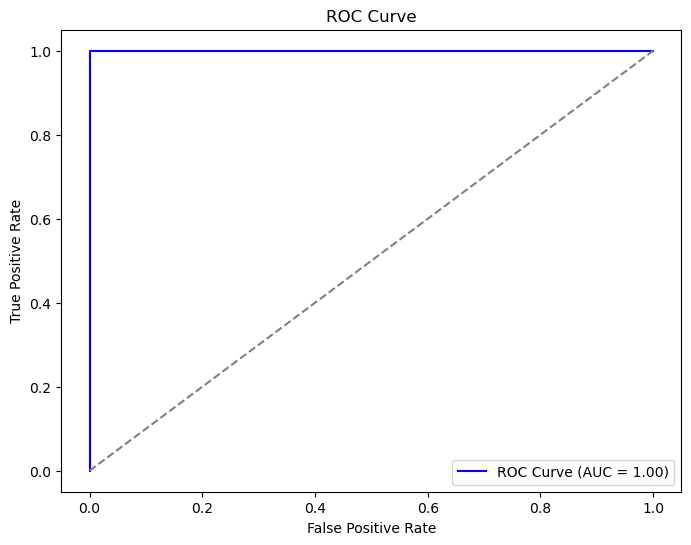

Cross-Validation Accuracy: Mean = 1.00, Std = 0.00


In [72]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import numpy as np

# Use the trained model, e.g., logistic_regression_model, svm_model, etc.
model_to_evaluate = svm_model  # Replace with the actual model you trained, like logistic_regression_model

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, model_to_evaluate.predict(X_test))
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, model_to_evaluate.predict(X_test))
print("Classification Report:\n", class_report)

# Feature Importance (for tree-based models)
if hasattr(model_to_evaluate, 'feature_importances_'):
    feature_importance = model_to_evaluate.feature_importances_
    features = X_train.columns  # assuming X_train is a DataFrame
    feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
    feature_df = feature_df.sort_values(by='Importance', ascending=False)
    print("Feature Importance:\n", feature_df)

# ROC Curve and AUC (for binary classification)
if len(set(y_test)) == 2:  # Binary classification check
    y_proba = model_to_evaluate.predict_proba(X_test)[:, 1]  # Probability of the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Cross-Validation Score
cv_scores = cross_val_score(model_to_evaluate, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: Mean = {np.mean(cv_scores):.2f}, Std = {np.std(cv_scores):.2f}")


In this various machine learning models were evaluated for a classification task, including Logistic Regression, Decision Tree, Random Forest, XGBoost, Support Vector Machine (SVM), Neural Networks (MLP), and Gradient Boosting. Each model was assessed using several performance metrics such as accuracy, confusion matrix, classification report, ROC curve, feature importance (for tree-based models), and cross-validation.